# WeatherPy
----
This is a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. Retrieve the data from the [OpenWeatherMap API](https://openweathermap.org/api) to create a representative model of weather across world cities.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "weatherpy_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500) 
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_names = []
countries = []
lat_ls = []
lng_ls = []
temp_ls = []
humidity_ls = []
cloudiness_ls = []
wind_speeds = []
dates = []


In [4]:
# Loop through cities from random select

print("Beginning data retrieval:\n-------------------------------------------")

index = 1
batch = 1

for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()

#     print(json.dumps(response_json, indent = 4, sort_keys = True))
#     break  
    
    try:
        
        city_name = response_json["name"]
        city_names.append(city_name)
        
        country = response_json["sys"]["country"]
        countries.append(country)
        
        lat = response_json["coord"]["lat"]
        lat_ls.append(lat)
        
        lng = response_json["coord"]["lon"]
        lng_ls.append(lng)
        
        temp = response_json["main"]["temp_max"]
        temp_ls.append(temp)
        
        humidity = response_json["main"]["humidity"]
        humidity_ls.append(humidity)
        
        cloudiness = response_json["clouds"]["all"]
        cloudiness_ls.append(cloudiness)
        
        wind_speed = response_json["wind"]["speed"]
        wind_speeds.append(wind_speed)
        
        date_timestamp = response_json["dt"]
        # Converting Date format
        converted_timestamp = datetime.utcfromtimestamp(date_timestamp)
        date = datetime.date(converted_timestamp)
        dates.append(date)
        
        print(f"Retrieving record {index} of set {batch} for {city_name}, {country}...success.")
        
        index += 1
        
        # openweathermap API limits calls to 60/minute
        if index > 50:
            # once 50 calls are made, starts a new batch
            batch += 1 
            index = 1
            # delay the execution 10 seconds once 50 calls are made
            time.sleep(10)
        
    except (KeyError, IndexError):
        print(f"Record {index} {city}, {country} not found. Skipping.")
        index += 1
        
        # openweathermap API limits calls to 60/minute
        if index > 50:
            batch += 1 
            index = 1
            time.sleep(10)
        
print(f"-------------------------------------------\nData retrieving process complete.")

Beginning data retrieval:
-------------------------------------------
Retrieving record 1 of set 1 for Keningau, MY...success.
Retrieving record 2 of set 1 for Mataura, NZ...success.
Record 3 santa eulalia del rio, NZ not found. Skipping.
Retrieving record 4 of set 1 for Barguzin, RU...success.
Retrieving record 5 of set 1 for Port Alfred, ZA...success.
Record 6 tsihombe, ZA not found. Skipping.
Retrieving record 7 of set 1 for Busselton, AU...success.
Retrieving record 8 of set 1 for Rikitea, PF...success.
Retrieving record 9 of set 1 for Shimoda, JP...success.
Record 10 toliary, JP not found. Skipping.
Record 11 karamay, JP not found. Skipping.
Retrieving record 12 of set 1 for Saskylakh, RU...success.
Record 13 attawapiskat, RU not found. Skipping.
Retrieving record 14 of set 1 for Lebu, CL...success.
Retrieving record 15 of set 1 for Srednekolymsk, RU...success.
Retrieving record 16 of set 1 for Nanortalik, GL...success.
Record 17 sentyabrskiy, GL not found. Skipping.
Retrieving re

Retrieving record 42 of set 3 for Hasaki, JP...success.
Retrieving record 43 of set 3 for Ahipara, NZ...success.
Retrieving record 44 of set 3 for Flinders, AU...success.
Retrieving record 45 of set 3 for Tautira, PF...success.
Retrieving record 46 of set 3 for Karratha, AU...success.
Retrieving record 47 of set 3 for Ziro, IN...success.
Retrieving record 48 of set 3 for Dikson, RU...success.
Retrieving record 49 of set 3 for Acajutla, SV...success.
Retrieving record 50 of set 3 for Inuvik, CA...success.
Retrieving record 1 of set 4 for San Quintín, MX...success.
Retrieving record 2 of set 4 for Tirumullaivāsal, IN...success.
Retrieving record 3 of set 4 for Brae, GB...success.
Retrieving record 4 of set 4 for Moerai, PF...success.
Retrieving record 5 of set 4 for Richards Bay, ZA...success.
Retrieving record 6 of set 4 for Saint-Leu, RE...success.
Record 7 illoqqortoormiut, RE not found. Skipping.
Retrieving record 8 of set 4 for Watsa, CD...success.
Record 9 saleaula, CD not found. S

Retrieving record 35 of set 6 for Canutama, BR...success.
Retrieving record 36 of set 6 for Laguna, US...success.
Retrieving record 37 of set 6 for Mangan, IN...success.
Retrieving record 38 of set 6 for Fort Nelson, CA...success.
Retrieving record 39 of set 6 for Rawson, AR...success.
Retrieving record 40 of set 6 for Deep River, CA...success.
Retrieving record 41 of set 6 for Kelowna, CA...success.
Retrieving record 42 of set 6 for Tiksi, RU...success.
Retrieving record 43 of set 6 for Deer Lake, CA...success.
Retrieving record 44 of set 6 for Ancud, CL...success.
Retrieving record 45 of set 6 for Sobolevo, RU...success.
Retrieving record 46 of set 6 for Larreynaga, NI...success.
Record 47 aporawan, NI not found. Skipping.
Retrieving record 48 of set 6 for Itarema, BR...success.
Retrieving record 49 of set 6 for Necochea, AR...success.
Retrieving record 50 of set 6 for Malanje, AO...success.
Retrieving record 1 of set 7 for Afareaitu, PF...success.
Retrieving record 2 of set 7 for Ro

Retrieving record 29 of set 9 for Kandrian, PG...success.
Retrieving record 30 of set 9 for Zhigansk, RU...success.
Retrieving record 31 of set 9 for Emirdağ, TR...success.
Retrieving record 32 of set 9 for Aripuanã, BR...success.
Retrieving record 33 of set 9 for Koslan, RU...success.
Retrieving record 34 of set 9 for Bam, IR...success.
Retrieving record 35 of set 9 for Raudeberg, NO...success.
Retrieving record 36 of set 9 for Russell, US...success.
Retrieving record 37 of set 9 for Bayir, TR...success.
Retrieving record 38 of set 9 for Maués, BR...success.
Retrieving record 39 of set 9 for Den Helder, NL...success.
Retrieving record 40 of set 9 for Zambezi, ZM...success.
Retrieving record 41 of set 9 for Yar-Sale, RU...success.
Retrieving record 42 of set 9 for Topeka, US...success.
Retrieving record 43 of set 9 for Aztec, US...success.
Retrieving record 44 of set 9 for Meulaboh, ID...success.
Retrieving record 45 of set 9 for Corinth, GR...success.
Retrieving record 46 of set 9 for

Retrieving record 23 of set 12 for Esperance, AU...success.
Retrieving record 24 of set 12 for Kawalu, ID...success.
Record 25 rungata, ID not found. Skipping.
Retrieving record 26 of set 12 for São Filipe, CV...success.
Retrieving record 27 of set 12 for Vila Franca do Campo, PT...success.
Retrieving record 28 of set 12 for Mbanza-Ngungu, CD...success.
Retrieving record 29 of set 12 for Marsaxlokk, MT...success.
Retrieving record 30 of set 12 for Tasiilaq, GL...success.
Retrieving record 31 of set 12 for Abu Kamal, SY...success.
Retrieving record 32 of set 12 for Virginia Beach, US...success.
Retrieving record 33 of set 12 for Barentu, ER...success.
Retrieving record 34 of set 12 for Montgomery, US...success.
Retrieving record 35 of set 12 for San Vicente, AR...success.
Retrieving record 36 of set 12 for Gwadar, PK...success.
Retrieving record 37 of set 12 for Hay River, CA...success.
Retrieving record 38 of set 12 for Mount Darwin, ZW...success.
Retrieving record 39 of set 12 for Bou

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Display the DataFrame
cities_df = pd.DataFrame({"City": city_names, "Country": countries, "Latitude": lat_ls, 
                          "Longitude": lng_ls, "Max Temperature (F)": temp_ls, "Humidity (%)": humidity_ls, 
                          "Cloudiness (%)": cloudiness_ls, "Wind Speed (mph)": wind_speeds, "Date": date})

cities_df.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,Keningau,MY,5.3378,116.1602,74.75,98,100,1.90,2021-10-22
1,Mataura,NZ,-46.1927,168.8643,44.64,92,93,1.28,2021-10-22
2,Barguzin,RU,53.6167,109.6167,32.25,74,4,1.68,2021-10-22
3,Port Alfred,ZA,-33.5906,26.8910,67.71,80,98,26.62,2021-10-22
4,Busselton,AU,-33.6500,115.3333,54.59,72,1,9.64,2021-10-22


In [6]:
cities_df.describe()

,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,18.696216,16.057264,62.544018,68.863158,59.843860,8.357439
std,33.234041,89.539745,21.528782,22.935124,37.597001,6.111798
min,-54.800000,-179.166700,-17.460000,5.000000,0.000000,0.000000
25%,-8.882550,-63.836300,50.520000,57.000000,20.000000,3.337500
50%,22.514400,22.712000,67.020000,75.000000,75.000000,7.000000
75%,46.689950,90.154900,79.085000,86.750000,97.000000,12.025000
max,78.218600,179.316700,101.190000,100.000000,100.000000,28.790000


In [7]:
# Export the city data into a .csv

cities_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# check if any city's humidity is higher than 100.
cities_df.loc[cities_df["Humidity (%)"]>100]

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date


In [9]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = cities_df.loc[cities_df["Humidity (%)"] > 100].index
high_humidity

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_df = cities_df.drop(high_humidity, inplace = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
# set up x, y for scatter plots
x_lat = clean_city_df["Latitude"]
y_temp = clean_city_df["Max Temperature (F)"]
y_humid = clean_city_df["Humidity (%)"]
y_cloud = clean_city_df["Cloudiness (%)"]
y_wind = clean_city_df["Wind Speed (mph)"]

## Latitude vs. Temperature Plot

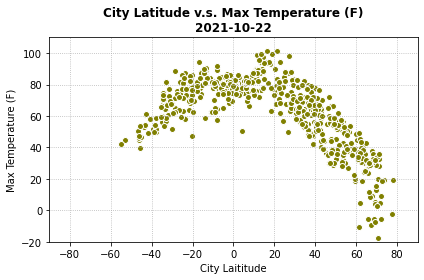

In [12]:
plt.figure(figsize = (6,4))
plt.scatter(x_lat, y_temp, marker = "o", color = "olive", edgecolor = "white")

plt.title(f"City Latitude v.s. Max Temperature (F)\n{date}", fontweight = "bold")
plt.xlabel("City Laititude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-90, 90)
plt.ylim(-20, 110)
plt.grid(linestyle = ":")

plt.tight_layout()

plt.savefig("image/Lat_vs_Temp")
plt.show()

#### This code is to see the realtionship between city latitude and temperature.  It appears the cities near the equator tend to be higher temperature.

## Latitude vs. Humidity Plot

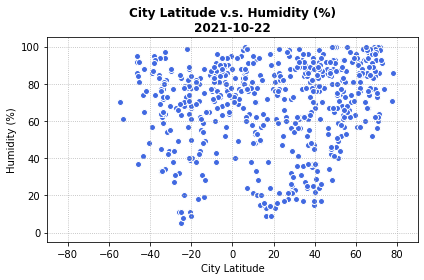

In [13]:
plt.figure(figsize = (6,4))
plt.scatter(x_lat, y_humid, marker = "o", color = "royalblue", edgecolor = "white")

plt.title(f"City Latitude v.s. Humidity (%)\n{date}", fontweight = "bold")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90, 90)
plt.ylim(-5, 105)
plt.grid(linestyle = ":")

plt.tight_layout()

plt.savefig("image/Lat_vs_Humid")
plt.show()

#### This code is to see the realtionship between city latitude and humidity.  It does not appear the two factors have much correlation.

## Latitude vs. Cloudiness Plot

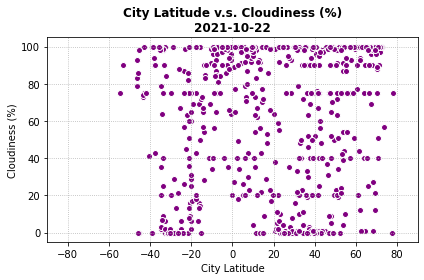

In [14]:
plt.figure(figsize = (6,4))
plt.scatter(x_lat, y_cloud, marker = "o", color = "purple", edgecolor = "white")

plt.title(f"City Latitude v.s. Cloudiness (%)\n{date}", fontweight = "bold")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90, 90)
plt.ylim(-5, 105)
plt.grid(linestyle = ":")

plt.tight_layout()

plt.savefig("image/Lat_vs_Cloud")
plt.show()

#### This code is to see the realtionship between city latitude and cloudiness.  It does not appear the two factors have much correlation.

## Latitude vs. Wind Speed Plot

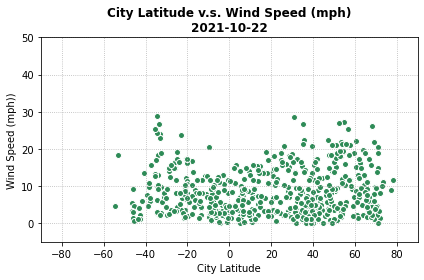

In [15]:
plt.figure(figsize = (6,4))
plt.scatter(x_lat, y_wind, marker = "o", color = "seagreen", edgecolor = "white")

plt.title(f"City Latitude v.s. Wind Speed (mph)\n{date}", fontweight = "bold")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph))")
plt.xlim(-90, 90)
plt.ylim(-5, 50)
plt.grid(linestyle = ":")

plt.tight_layout()

plt.savefig("image/Lat_vs_Wind")
plt.show()

#### This code is to see the realtionship between city latitude and wind speed.  It does not appear the two factor have much correlation. However, the cityies closer to the equator have less extreme wind speed.

## Linear Regression

In [16]:
n_hemisphere_df = clean_city_df.loc[clean_city_df["Latitude"] >= 0]
s_hemisphere_df = clean_city_df.loc[clean_city_df["Latitude"] < 0]
s_hemisphere_df.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
1,Mataura,NZ,-46.1927,168.8643,44.64,92,93,1.28,2021-10-22
3,Port Alfred,ZA,-33.5906,26.8910,67.71,80,98,26.62,2021-10-22
4,Busselton,AU,-33.6500,115.3333,54.59,72,1,9.64,2021-10-22
5,Rikitea,PF,-23.1203,-134.9692,73.69,79,99,23.85,2021-10-22
8,Lebu,CL,-37.6167,-73.6500,49.91,74,43,15.61,2021-10-22


In [17]:
# set a function to create Linear Regression plots

def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = round(rvalue**2,2)

    plt.scatter(x, y, marker = "o", color = color, edgecolor = "white")
    plt.plot(x,regress_values,"r-")
    
    # add the linear regression equation and line
    plt.annotate(line_eq, position, fontsize = 15, color = "red", fontweight = "bold")
    plt.title(f"{title}\n{date}", fontweight = "bold")
    plt.xlabel("City Latitude")
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue}")
        
    plt.savefig(f"image/{figname}.png")
    plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8622896028774887


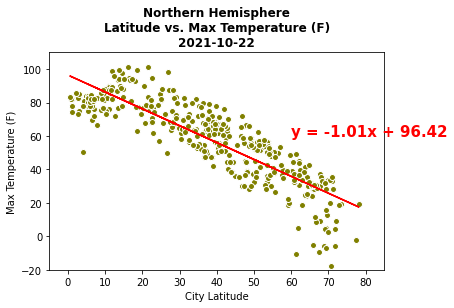

None


In [18]:
x = n_hemisphere_df["Latitude"]
y = n_hemisphere_df["Max Temperature (F)"]
y_label = "Max Temperature (F)"
title = f"Northern Hemisphere\nLatitude vs. {y_label}"
color = "olive"
position = (60, 60)

plt.xlim(-5, 85)
plt.ylim(-20, 110)
figname = "linreg_N_Temp"

print(linregress_plot(x,y))


#### The r value shows that in Northern Hemisphere, the city's latitude and the temperature has a strong negaitive relationship.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6822691054401323


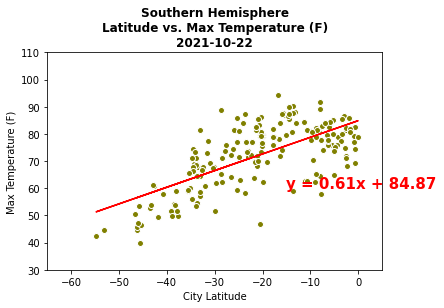

None


In [19]:
x = s_hemisphere_df["Latitude"]
y = s_hemisphere_df["Max Temperature (F)"]
y_label = "Max Temperature (F)"
title = f"Southern Hemisphere\nLatitude vs. {y_label}"
color = "olive"
position = (-15, 60)

plt.xlim(-65, 5)
plt.ylim(30, 110)
figname = "linreg_S_Temp"

print(linregress_plot(x,y))


#### The r value shows that in Southern Hemisphere, the city's latitude and the temperature has a strong positive relationship.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.24596406714256724


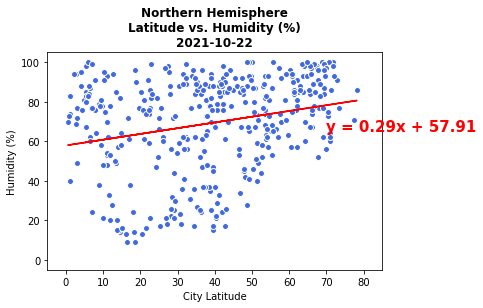

None


In [20]:
x = n_hemisphere_df["Latitude"]
y = n_hemisphere_df["Humidity (%)"]
y_label = "Humidity (%)"
title = f"Northern Hemisphere\nLatitude vs. {y_label}"
color = "royalblue"
position = (70, 65)

plt.xlim(-5, 85)
plt.ylim(-5, 105)
figname = "linreg_N_Humid"

print(linregress_plot(x,y))


#### The r value shows that in Northern Hemisphere, the city's latitude and the humidity have a weak positive relationship.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12317400370007538


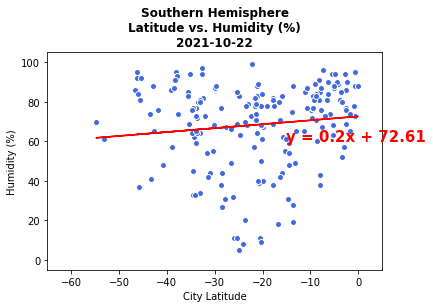

None


In [21]:
x = s_hemisphere_df["Latitude"]
y = s_hemisphere_df["Humidity (%)"]
y_label = "Humidity (%)"
title = f"Southern Hemisphere\nLatitude vs. {y_label}"
color = "royalblue"
position = (-15, 60)

plt.xlim(-65, 5)
plt.ylim(-5, 105)
figname = "linreg_S_Humid"

print(linregress_plot(x,y))


#### The r value shows that in Southern Hemisphere, the city's latitude and the humidity have a somehow weak positive relationship.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16776692594322204


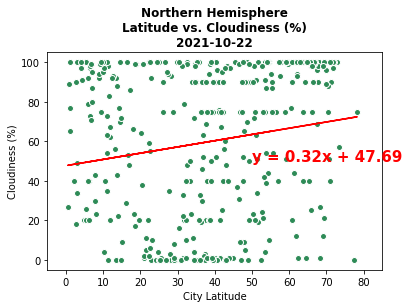

None


In [22]:
x = n_hemisphere_df["Latitude"]
y = n_hemisphere_df["Cloudiness (%)"]
y_label = "Cloudiness (%)"
title = f"Northern Hemisphere\nLatitude vs. {y_label}"
color = "seagreen"
position = (50, 50)

plt.xlim(-5, 85)
plt.ylim(-5, 105)
figname = "linreg_N_Cloud"

print(linregress_plot(x,y))


#### The r value shows that in Southern Hemisphere, the city's latitude and the cloudiness doesn't have relationship.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2905841406117107


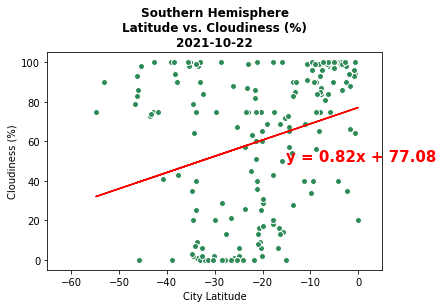

None


In [23]:
x = s_hemisphere_df["Latitude"]
y = s_hemisphere_df["Cloudiness (%)"]
y_label = "Cloudiness (%)"
title = f"Southern Hemisphere\nLatitude vs. {y_label}"
color = "seagreen"
position = (-15, 50)

plt.xlim(-65, 5)
plt.ylim(-5, 105)
figname = "linreg_S_Cloud"

print(linregress_plot(x,y))


#### The r value shows that in Southern Hemisphere, the city's latitude and the cloudiness have a somehow strong positive relationship.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.14196683919950076


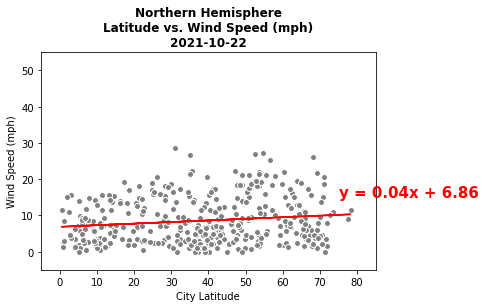

None


In [24]:
x = n_hemisphere_df["Latitude"]
y = n_hemisphere_df["Wind Speed (mph)"]
y_label = "Wind Speed (mph)"
title = f"Northern Hemisphere\nLatitude vs. {y_label}"
color = "gray"
position = (75, 15)

plt.xlim(-5, 85)
plt.ylim(-5, 55)
figname = "linreg_N_Wind"

print(linregress_plot(x,y))


#### The r value shows that in Northern Hemisphere, the city's latitude and the wind speed have a weak positive relationship.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.21986226041454368


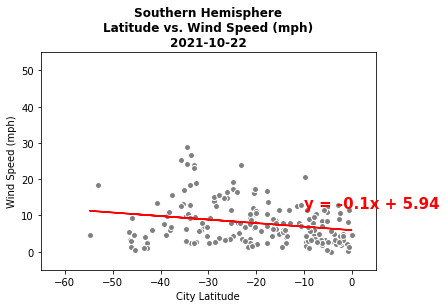

None


In [25]:
x = s_hemisphere_df["Latitude"]
y = s_hemisphere_df["Wind Speed (mph)"]
y_label = "Wind Speed (mph)"
title = f"Southern Hemisphere\nLatitude vs. {y_label}"
color = "gray"
position = (-10, 12)

plt.xlim(-65, 5)
plt.ylim(-5, 55)
figname = "linreg_S_Wind"

print(linregress_plot(x,y))


#### The r value shows that in Southern Hemisphere, the city's latitude and the wind speed have a weak negitive relationship.